**Important**: Click on "*Kernel*" > "*Restart Kernel and Clear All Outputs*" *before* reading this chapter in [JupyterLab <img height="12" style="display: inline-block" src="static/link_to_jp.png">](https://jupyterlab.readthedocs.io/en/stable/) (e.g., in the cloud on [MyBinder <img height="12" style="display: inline-block" src="static/link_to_mb.png">](https://mybinder.org/v2/gh/webartifex/intro-to-python/master?urlpath=lab/tree/02_functions_00_content.ipynb))

# Chapter 2: Functions & Modularization

In [Chapter 1 <img height="12" style="display: inline-block" src="static/link_to_nb.png">](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/01_elements_00_content.ipynb#Example:-Averaging-all-even-Numbers-in-a-List), we simply typed the code to calculate the average of the even numbers in a list of whole numbers into several code cells. Then, we executed them one after another. We had no way of *reusing* the code except for either executing cells multiple times. And, whenever we find ourselves doing repetitive manual work, we can be sure that there must be a way of automating what we are doing.

This chapter shows how Python offers language constructs that let us **define** functions ourselves that we may then **call** just like the built-in ones. Also, we look at how we can extend our Python installation with functionalities written by other people.

## [Built-in Functions <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html)

Python comes with plenty of useful functions built in, some of which we have already seen before (e.g., [print() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#print), [sum() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#sum), [len() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#len), or [id() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#id)). The [documentation <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html) has the full list. Just as core Python itself, they are mostly implemented in C and thus very fast.

Below, [sum() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#sum) adds up all the elements in the `numbers` list while [len() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#len) counts the number of elements in it.

In [1]:
numbers = [7, 11, 8, 5, 3, 12, 2, 6, 9, 10, 1, 4]

In [2]:
sum(numbers)

78

In [3]:
len(numbers)

12

`sum` and `len` are *no* [keywords <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/reference/lexical_analysis.html#keywords) like `for` or `if` but variables that reference *objects* in memory. Often, we hear people say that "everything is an object in Python" (e.g., this [question <img height="12" style="display: inline-block" src="static/link_to_so.png">](https://stackoverflow.com/questions/40478536/in-python-what-does-it-mean-by-everything-is-an-object)). While this phrase may sound abstract in the beginning, it simply means that the entire memory is organized with "bags" of $0$s and $1$s, and there are even bags for the built-in functions. That is *not* true for many other languages (e.g., C or Java) and often a source of confusion for people coming to Python from another language.

The built-in [id() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#id) function tells us where in memory a particular built-in function is stored.

In [4]:
id(sum)

140168648947264

In [5]:
id(len)

140168648946224

[type() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#type) reveals that built-in functions like [sum() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#sum) or [len() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#len) are objects of type `builtin_function_or_method`.

In [6]:
type(sum)

builtin_function_or_method

In [7]:
type(len)

builtin_function_or_method

Python's object-oriented nature allows us to have functions work with themselves. While seemingly not useful from a beginner's point of view, that enables a lot of powerful programming styles later on.

In [8]:
id(id)

140168648945824

In [9]:
type(type)

type

To execute a function, we **call** it with the **call operator** `()` as shown many times in [Chapter 1 <img height="12" style="display: inline-block" src="static/link_to_nb.png">](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/01_elements_00_content.ipynb) and above.

If we are unsure whether a variable references a function or not, we can verify that with the built-in [callable() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#callable) function.

Abstractly speaking, *any* object that can be called with the call operator `()` is a so-called **callable**. And, objects of type `builtin_function_or_method` are just one kind of examples thereof. We will see another one already in the next sub-section.

In [10]:
callable(sum)

True

In [11]:
callable(len)

True

`list` objects, for example, are *not* callable.

In [12]:
callable(numbers)

False

### Constructors

The list of [built-in functions <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html) in the documentation should really be named a list of built-in *callables*.

Besides the built-in functions, the list also features **constructors** for the built-in types. They may be used to **[cast <img height="12" style="display: inline-block" src="static/link_to_wiki.png">](https://en.wikipedia.org/wiki/Type_conversion)** (i.e., "convert") any object as an object of a given type.

For example, to "convert" a `float` or a `str` into an `int` object, we use the [int() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#int) built-in. Below, *new* `int` objects are created from the `7.0` and `"7"` objects that are *newly* created themselves before being processed by [int() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#int) right away *without* ever being referenced by a variable.

In [13]:
int(7.0)

7

In [14]:
int("7")

7

Casting an object as an `int` is different from rounding with the built-in [round() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#round) function!

In [15]:
int(7.99)

7

In [16]:
round(7.99)

8

Notice the subtle difference compared to the behavior of the `//` operator in [Chapter 1 <img height="12" style="display: inline-block" src="static/link_to_nb.png">](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/01_elements_00_content.ipynb##%28Arithmetic#%29-Operators) that "rounds" towards minus infinity: [int() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#int) always "rounds" towards `0`.

In [17]:
int(-7.99)

-7

Not all conversions are valid and *runtime* errors may occur as the `ValueError` shows.

In [18]:
int("seven")

ValueError: invalid literal for int() with base 10: 'seven'

We may also cast in the other direction with the [float() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#float)  or [str() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#func-str) built-ins.

In [19]:
float(7)

7.0

In [20]:
str(7)

'7'

Constructors are full-fledged objects as well.

In [21]:
id(int)

93973021516992

In [22]:
id(float)

93973021520896

They are of type `type`, which is different from `builtin_function_or_method` above.

In [23]:
type(int)

type

In [24]:
type(float)

type

As already noted, constructors are *callables*. In that regard, they behave the same as built-in functions. We may call them with the call operator `()`.

In [25]:
callable(int)

True

In [26]:
callable(float)

True

The attentive student may already have discovered that we refer to `builtin_function_or_method` objects as "built-in functions" and `type` objects as just "built-ins." For a beginner, that difference is not so important. But, the ambitious student should already be aware that such subtleties exist.

Next, let's look at a third kind of callables.

##  Function Definitions

We may create so-called *user-defined* **functions** with the `def` statement (cf., [reference <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/reference/compound_stmts.html#function-definitions)). To extend an already familiar example, we reuse the introductory example from [Chapter 1 <img height="12" style="display: inline-block" src="static/link_to_nb.png">](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/01_elements_00_content.ipynb#Best-Practices) in its final Pythonic version and transform it into the function `average_evens()` below. We replace the variable name `numbers` with `integers` for didactical purposes in the first couple of examples.

A function's **name** must be chosen according to the same naming rules as ordinary variables since Python manages function names like variables. In this book, we further adopt the convention of ending function names with parentheses `()` in text cells for faster comprehension when reading (i.e., `average_evens()` vs. `average_evens`). These are *not* part of the name but must always be written out in the `def` statement for syntactic reasons.

Functions may define an arbitrary number of **parameters** as inputs that can then be referenced within the indented **code block**: They are listed within the parentheses in the `def` statement (i.e., `integers` below). 

The code block is also called a function's **body**, while the first line starting with `def` and ending with a colon is the **header**.

Together, the name and the list of parameters are also referred to as the function's **[signature <img height="12" style="display: inline-block" src="static/link_to_wiki.png">](https://en.wikipedia.org/wiki/Type_signature)** (i.e., `average_evens(integers)` below).

A function may specify an *explicit* **return value** (i.e., "result" or "output") with the `return` statement (cf., [reference <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/reference/simple_stmts.html#the-return-statement)): Functions that have one are considered **fruitful**; otherwise, they are **void**. Functions of the latter kind are still useful because of their **side effects**. For example, the built-in [print() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#print) function changes what we see on the screen. Strictly speaking, [print() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#print) and other void functions also have an *implicit* return value, namely the `None` object.

A function should define a **docstring** that describes what it does in a short subject line, what parameters it expects (i.e., their types), and what it returns, if anything. A docstring is a syntactically valid multi-line string (i.e., type `str`) defined within **triple-double quotes** `"""`. Strings are covered in depth in [Chapter 6 <img height="12" style="display: inline-block" src="static/link_to_nb.png">](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/06_text_00_content.ipynb#The-str-Type). Widely adopted standards for docstrings are [PEP 257 <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://www.python.org/dev/peps/pep-0257/) and section 3.8 of [Google's Python Style Guide <img height="12" style="display: inline-block" src="static/link_to_gh.png">](https://github.com/google/styleguide/blob/gh-pages/pyguide.md).

In [27]:
def average_evens(integers):
    """Calculate the average of all even numbers in a list.

    Args:
        integers (list of int's): whole numbers to be averaged

    Returns:
        average (float)
    """
    evens = [n for n in integers if n % 2 == 0]
    average = sum(evens) / len(evens)
    return average

Once defined, a function may be referenced just like any other variable by its name (i.e., *without* the parentheses).

In [28]:
average_evens

<function __main__.average_evens(integers)>

This works as functions are full-fledged *objects*. So, `average_evens` is just a name referencing an object in memory with an **identity**, a **type**, namely `function`, and a **value**. In that regard, `average_evens` is *no* different from the variable `numbers` or the built-ins' names.

In [29]:
id(average_evens)

140168546232512

In [30]:
type(average_evens)

function

Its value may seem awkward at first: It consists of a location showing where the function is defined (i.e., `__main__` here, which is Python's way of saying "in this notebook") and the signature wrapped inside angle brackets `<` and `>`.
 
The angle brackets are a convention to indicate that the value may *not* be used as a *literal* (i.e., typed back into another code cell). [Chapter 10 <img height="12" style="display: inline-block" src="static/link_to_nb.png">](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/10_classes_00_content.ipynb) introduces the concept of a **text representation** of an object, which is related to the *semantic* meaning of an object's value as discussed in [Chapter 1 <img height="12" style="display: inline-block" src="static/link_to_nb.png">](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/01_elements_00_content.ipynb#Value-/-"Meaning"), and the angle brackets convention is one such way to represent an object as text. When executed, the angle brackets cause a `SyntaxError` because Python expects the `<` operator to come with an operand on both sides (cf., [Chapter 3 <img height="12" style="display: inline-block" src="static/link_to_nb.png">](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/03_conditionals_00_content.ipynb#Relational-Operators)).

In [31]:
<function __main__.average_evens(numbers)>

SyntaxError: invalid syntax (<ipython-input-31-7f49dff38622>, line 1)

`average_evens` is, of course, callable. So, the `function` type is the third kind of callable in this chapter.

In [32]:
callable(average_evens)

True

The built-in [help() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#help) function shows a function's docstring.

Whenever we use code to analyze or obtain information on an object, we say that we **[introspect <img height="12" style="display: inline-block" src="static/link_to_wiki.png">](https://en.wikipedia.org/wiki/Type_introspection)** it.

In [33]:
help(average_evens)

Help on function average_evens in module __main__:

average_evens(integers)
    Calculate the average of all even numbers in a list.
    
    Args:
        integers (list of int's): whole numbers to be averaged
    
    Returns:
        average (float)



In a Jupyter notebook, we can just as well add a question mark to a function's name to achieve the same.

In [34]:
average_evens?

Signature: average_evens(integers)
Docstring:
Calculate the average of all even numbers in a list.

Args:
    integers (list of int's): whole numbers to be averaged

Returns:
    average (float)
File:      ~/repos/intro-to-python/<ipython-input-27-bcb78a3113d7>
Type:      function


Two question marks show a function's source code.

In [35]:
average_evens??

Signature: average_evens(integers)
Source:   
def average_evens(integers):
    """Calculate the average of all even numbers in a list.

    Args:
        integers (list of int's): whole numbers to be averaged

    Returns:
        average (float)
    """
    evens = [n for n in integers if n % 2 == 0]
    average = sum(evens) / len(evens)
    return average
File:      ~/repos/intro-to-python/<ipython-input-27-bcb78a3113d7>
Type:      function


[help() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#help) and the `?`s also work for built-ins.

In [36]:
help(sum)

Help on built-in function sum in module builtins:

sum(iterable, start=0, /)
    Return the sum of a 'start' value (default: 0) plus an iterable of numbers
    
    When the iterable is empty, return the start value.
    This function is intended specifically for use with numeric values and may
    reject non-numeric types.



## Function Calls

Once defined, we may call a function with the call operator `()` as often as we wish. The formal parameters are then filled in by **passing** *expressions* (e.g., literals or variables) as **arguments** to the function within the parentheses.

In [37]:
average_evens([7, 11, 8, 5, 3, 12, 2, 6, 9, 10, 1, 4])

7.0

In [38]:
average_evens(numbers)

7.0

A function call's return value is commonly assigned to a variable for subsequent use. Otherwise, we lose access to the returned object right away.

In [39]:
result = average_evens(numbers)

In [40]:
result

7.0

## Scoping Rules

### Local Scope disappears

The parameters listed in a function's definition (i.e., `integers` in the example) and variables created *inside* it during execution (i.e., `evens` and `average`) are **local** to that function. That means they only reference an object in memory *while* the function is being executed and are dereferenced immediately when the function call returns. We say they go out of **scope**. That is why we see the `NameError`s below.

In [41]:
integers

NameError: name 'integers' is not defined

In [42]:
evens

NameError: name 'evens' is not defined

In [43]:
average

NameError: name 'average' is not defined

[PythonTutor <img height="12" style="display: inline-block" src="static/link_to_py.png">](http://pythontutor.com/visualize.html#code=numbers%20%3D%20%5B7,%2011,%208,%205,%203,%2012,%202,%206,%209,%2010,%201,%204%5D%0A%0Adef%20average_evens%28integers%29%3A%0A%20%20%20%20evens%20%3D%20%5Bn%20for%20n%20in%20integers%20if%20n%20%25%202%20%3D%3D%200%5D%0A%20%20%20%20average%20%3D%20sum%28evens%29%20/%20len%28evens%29%0A%20%20%20%20return%20average%0A%0Aresult%20%3D%20average_evens%28numbers%29&cumulative=false&curInstr=0&heapPrimitives=nevernest&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false) visualizes what happens in memory: To be precise, in the exact moment when the function call is initiated and `numbers` passed in as the `integers` argument, there are *two* references to the *same* `list` object (cf., steps 4-5 in the visualization). We also see how Python creates a *new* **frame** that holds the function's local scope (i.e., "internal names") in addition to the **global** frame. Frames are nothing but [namespaces <img height="12" style="display: inline-block" src="static/link_to_wiki.png">](https://en.wikipedia.org/wiki/Namespace) to *isolate* the names of different **scopes** from each other. The list comprehension `[n for n in integers if n % 2 == 0]` constitutes yet another frame that is in scope as the `list` object assigned to `evens` is *being* created (cf., steps 6-20). When the function returns, only the global frame is left (cf., last step).

### Global Scope is everywhere

On the contrary, while a function is *being* executed, it may reference the variables of **enclosing scopes** (i.e., "outside" of it). This is a common source of *semantic* errors. Consider the following stylized and incorrect example `average_wrong()`. The error is hard to spot with eyes: The function never references the `integers` parameter but the `numbers` variable in the **global scope** instead.

In [44]:
def average_wrong(integers):
    """Calculate the average of all even numbers in a list.

    Args:
        integers (list of int's): whole numbers to be averaged

    Returns:
        average (float)
    """
    evens = [n for n in numbers if n % 2 == 0]
    average = sum(evens) / len(evens)
    return average

`numbers` in the global scope is, of course, *not* changed by merely defining `average_wrong()`.

In [45]:
numbers

[7, 11, 8, 5, 3, 12, 2, 6, 9, 10, 1, 4]

Sometimes a function may return a correct solution for *some* inputs ...

In [46]:
average_wrong(numbers)  # correct by accident

7.0

... but still be wrong *in general*.

In [47]:
average_wrong([123, 456, 789])

7.0

[PythonTutor <img height="12" style="display: inline-block" src="static/link_to_py.png">](http://pythontutor.com/visualize.html#code=numbers%20%3D%20%5B7,%2011,%208,%205,%203,%2012,%202,%206,%209,%2010,%201,%204%5D%0A%0Adef%20average_wrong%28integers%29%3A%0A%20%20%20%20evens%20%3D%20%5Bn%20for%20n%20in%20numbers%20if%20n%20%25%202%20%3D%3D%200%5D%0A%20%20%20%20average%20%3D%20sum%28evens%29%20/%20len%28evens%29%0A%20%20%20%20return%20average%0A%0Aresult%20%3D%20average_wrong%28%5B123,%20456,%20789%5D%29&cumulative=false&curInstr=0&heapPrimitives=nevernest&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false) is again helpful at visualizing the error interactively: Creating the `list` object `evens` eventually references takes *16* computational steps, namely two for managing the list comprehension, one for setting up an empty `list` object, *twelve* for filling it with elements derived from `numbers` in the global scope (i.e., that is the error), and one to make `evens` reference it (cf., steps 6-21).

The frames logic shown by PythonTutor is the mechanism with which Python not only manages the names inside *one* function call but also for *many* potentially *simultaneous* calls, as revealed in [Chapter 4 <img height="12" style="display: inline-block" src="static/link_to_nb.png">](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/04_iteration_00_content.ipynb#Trivial-Example:-Countdown). It is the reason why we may reuse the same names for the parameters and variables inside both `average_evens()` and `average_wrong()` without Python mixing them up. So, as we already read in the [Zen of Python <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://www.python.org/dev/peps/pep-0020/), "namespaces are one honking great idea" (cf., `import this`), and a frame is just a special kind of namespace.

### Shadowing

Code gets even more confusing when variables by the *same* name from *different* scopes collide. In particular, what should we expect to happen if a function "changes" a globally defined variable in its body?

`average_evens()` below works like `average_evens()` above except that it rounds the numbers in `integers` with the built-in [round() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#round) function before filtering and averaging them. [round() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#round) returns `int` objects independent of its argument being an `int` or a `float` object. On the first line in its body, `average_evens()` introduces a *local* variable `numbers` whose name collides with the one defined in the global scope.

In [48]:
def average_evens(integers):
    """Calculate the average of all even numbers in a list.

    Args:
        integers (list of int's/float's): numbers to be averaged;
            if non-whole numbers are provided, they are rounded

    Returns:
        average (float)
    """
    numbers = [round(n) for n in integers]
    evens = [n for n in numbers if n % 2 == 0]
    average = sum(evens) / len(evens)
    return average

As a good practice, let's first "verify" that `average_evens()` is "correct" by calling it with inputs for which we can calculate the answer in our heads. Treating a function as a "black box" (i.e., input-output specification) when testing is also called [unit testing <img height="12" style="display: inline-block" src="static/link_to_wiki.png">](https://en.wikipedia.org/wiki/Unit_testing) and plays an important role in modern software engineering.

In [49]:
average_evens([40.0, 41.1, 42.2, 43.3, 44.4])

42.0

Such tests are often and conveniently expressed with the `assert` statement (cf., [reference <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/reference/simple_stmts.html#the-assert-statement)): If the expression following `assert` evaluates to `True`, nothing happens.

In [50]:
assert average_evens([40.0, 41.1, 42.2, 43.3, 44.4]) == 42.0

However, if the expression evaluates to `False`, an `AssertionError` is raised.

In [51]:
assert average_evens([40.0, 41.1, 42.2, 43.3, 44.4]) == 87.0

AssertionError: 

Calling `average_evens()` leaves `numbers` in the global scope unchanged.

In [52]:
numbers

[7, 11, 8, 5, 3, 12, 2, 6, 9, 10, 1, 4]

To add to the confusion, let's also pass the global `numbers` list as an argument to `average_evens()`. The return value is the same as before.

In [53]:
average_evens(numbers)

7.0

In summary, Python is smart enough to keep all the involved `numbers` variables apart. So, the global `numbers` variable is still referencing the *same* `list` object as before.

In [54]:
numbers

[7, 11, 8, 5, 3, 12, 2, 6, 9, 10, 1, 4]

The reason why everything works is that *every* time we (re-)assign an object to a variable *inside* a function's body with the `=` statement, this is done in the *local* scope by default. There are ways to change variables existing in an outer scope from within a function, but this is a rather advanced topic.

[PythonTutor <img height="12" style="display: inline-block" src="static/link_to_py.png">](http://pythontutor.com/visualize.html#code=numbers%20%3D%20%5B7,%2011,%208,%205,%203,%2012,%202,%206,%209,%2010,%201,%204%5D%0A%0Adef%20average_evens%28integers%29%3A%0A%20%20%20%20numbers%20%3D%20%5Bround%28n%29%20for%20n%20in%20integers%5D%0A%20%20%20%20evens%20%3D%20%5Bn%20for%20n%20in%20numbers%20if%20n%20%25%202%20%3D%3D%200%5D%0A%20%20%20%20average%20%3D%20sum%28evens%29%20/%20len%28evens%29%0A%20%20%20%20return%20average%0A%0Aresult%20%3D%20average_evens%28%5B40.0,%2041.1,%2042.2,%2043.3,%2044.4%5D%29&cumulative=false&curInstr=0&heapPrimitives=nevernest&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false) shows how *two* `numbers` variables exist in *different* scopes referencing *different* objects (cf., steps 14-25) when we execute `average_evens([40.0, 41.1, 42.2, 43.3, 44.4])`.

Variables whose names collide with the ones of variables in enclosing scopes - and the global scope is just the most enclosing scope - are said to **shadow** them.

While this is not a problem for Python, it may lead to less readable code for humans and should be avoided if possible. But, as the software engineering wisdom goes, "[naming things](https://skeptics.stackexchange.com/questions/19836/has-phil-karlton-ever-said-there-are-only-two-hard-things-in-computer-science)" is often considered a hard problem as well, and we have to be prepared to encounter shadowing variables.

Shadowing also occurs if a parameter in the function definition goes by the same name as a variable in an outer scope. Below, `average_evens()` is identical to the first version in this chapter except that the parameter `integers` is now called `numbers` as well.

In [55]:
def average_evens(numbers):
    """Calculate the average of all even numbers in a list.

    Args:
        numbers (list of int's): whole numbers to be averaged

    Returns:
        average (float)
    """
    evens = [n for n in numbers if n % 2 == 0]
    average = sum(evens) / len(evens)
    return average

In [56]:
average_evens(numbers)

7.0

In [57]:
numbers

[7, 11, 8, 5, 3, 12, 2, 6, 9, 10, 1, 4]

[PythonTutor <img height="12" style="display: inline-block" src="static/link_to_py.png">](http://pythontutor.com/visualize.html#code=numbers%20%3D%20%5B7,%2011,%208,%205,%203,%2012,%202,%206,%209,%2010,%201,%204%5D%0A%0Adef%20average_evens%28numbers%29%3A%0A%20%20%20%20evens%20%3D%20%5Bn%20for%20n%20in%20numbers%20if%20n%20%25%202%20%3D%3D%200%5D%0A%20%20%20%20average%20%3D%20sum%28evens%29%20/%20len%28evens%29%0A%20%20%20%20return%20average%0A%0Aresult%20%3D%20average_evens%28numbers%29&cumulative=false&curInstr=0&heapPrimitives=nevernest&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false) reveals that in this example there are *two* `numbers` variables in *different* scope referencing the *same* `list` object in memory (cf., steps 4-23).

## Positional vs. Keyword Arguments

So far, we have specified only one parameter in each of our user-defined functions. In [Chapter 1 <img height="12" style="display: inline-block" src="static/link_to_nb.png">](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/01_elements_00_content.ipynb#%28Arithmetic%29-Operators), however, we saw the built-in [divmod() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#divmod) function take two arguments. And, the order in which they are passed in matters! Whenever we call a function and list its arguments in a comma separated manner, we say that we pass in the arguments *by position* or refer to them as **positional arguments**.

In [58]:
divmod(42, 10)

(4, 2)

In [59]:
divmod(10, 42)

(0, 10)

For many functions, there is a natural order to the arguments: For example, for any kind of division passing the dividend first and the divisor second seems intuitive. But what if that is not the case in another setting? For example, let's create a close relative of the above `average_evens()` function that also scales the resulting average by a factor. What is more natural? Passing in `numbers` first? Or `scalar`? There is no obvious way and we continue with the first alternative for no concrete reason.

In [60]:
def scaled_average_evens(numbers, scalar):
    """Calculate the scaled average of all even numbers in a list.

    Args:
        numbers (list of int's/float's): numbers to be averaged;
            if non-whole numbers are provided, they are rounded
        scalar (float): multiplies the average

    Returns:
        scaled_average (float)
    """
    numbers = [round(n) for n in numbers]
    evens = [n for n in numbers if n % 2 == 0]
    average = sum(evens) / len(evens)
    return scalar * average

As with [divmod() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#divmod), we may pass in the arguments by position.

In [61]:
scaled_average_evens(numbers, 2)

14.0

Now, this function call is a bit harder to understand as we always need to remember what the `2` means. This becomes even harder with more parameters.

Luckily, we may also pass in arguments *by name*. Then, we refer to them as **keyword arguments**.

In [62]:
scaled_average_evens(numbers=numbers, scalar=2)

14.0

When passing all arguments by name, we may do so in any order.

In [63]:
scaled_average_evens(scalar=2, numbers=numbers)

14.0

We may even combine positional and keyword arguments in the same function call.

In [64]:
scaled_average_evens(numbers, scalar=2)

14.0

Unfortunately, there are ways to screw this up with a `SyntaxError`: If positional and keyword arguments are mixed, the keyword arguments *must* come last.

In [65]:
scaled_average_evens(numbers=numbers, 2)

SyntaxError: positional argument follows keyword argument (<ipython-input-65-b00eb6f72e84>, line 1)

Similarly, we must always pass in the right number of arguments. Otherwise, a `TypeError` is raised.

In [66]:
scaled_average_evens(numbers)

TypeError: scaled_average_evens() missing 1 required positional argument: 'scalar'

In [67]:
scaled_average_evens(numbers, 2, 3)

TypeError: scaled_average_evens() takes 2 positional arguments but 3 were given

### Modularization

Defining `average_evens()` and `scaled_average_evens()` as above leads to a repetition of most of their code. That is *not* good as such a redundancy makes a code base hard to maintain in the long run: Whenever we change the logic in one function, we must *not* forget to do so for the other function as well. And, most likely, we forget about such issues in larger projects.

Below, three of four lines in the functions' bodies are identical!

In [68]:
def average_evens(numbers):
    """ ... ... ... """
    numbers = [round(n) for n in numbers]
    evens = [n for n in numbers if n % 2 == 0]
    average = sum(evens) / len(evens)
    return average

In [69]:
def scaled_average_evens(numbers, scalar):
    """ ... ... ... """
    numbers = [round(n) for n in numbers]
    evens = [n for n in numbers if n % 2 == 0]
    average = sum(evens) / len(evens)
    return scalar * average

A better way is to design related functions in a **modular** fashion such that they reuse each other's code.

For example, as not scaling an average is just a special case of scaling it with `1`, we could redefine the two functions like below: In this version, the function resembling the *special* case, `average_evens()`, **forwards** the call to the more *general* function, `scaled_average_evens()`, passing a `scalar` argument of `1`. As the name `scaled_average_evens` within the body of `average_evens()` is looked up each time the function is *being* executed, we may define `average_evens()` before `scaled_average_evens()`.

In [70]:
def average_evens(numbers):
    """ ... ... ... """
    return scaled_average_evens(numbers, scalar=1)

In [71]:
def scaled_average_evens(numbers, scalar):
    """ ... ... ... """
    numbers = [round(n) for n in numbers]
    evens = [n for n in numbers if n % 2 == 0]
    average = sum(evens) / len(evens)
    return scalar * average

After **refactoring** the functions, it is a good idea to test them again.

In [72]:
assert average_evens(numbers) == 7.0

In [73]:
assert scaled_average_evens(numbers, 2) == 14.0

### Default Arguments

*Assuming* that scaling the average occurs rarely, it may be a good idea to handle both cases in *one* function definition by providing a **default argument** of `1` for the `scalar` parameter.

In [74]:
def average_evens(numbers, scalar=1):
    """Calculate the average of all even numbers in a list.

    Args:
        numbers (list of int's/float's): numbers to be averaged;
            if non-whole numbers are provided, they are rounded
        scalar (float, optional): multiplies the average; defaults to 1

    Returns:
        scaled_average (float)
    """
    numbers = [round(n) for n in numbers]
    evens = [n for n in numbers if n % 2 == 0]
    average = sum(evens) / len(evens)
    return scalar * average

Now, we call the function with or without passing a `scalar` argument.

If `scalar` is *not* passed in, it automatically takes the value `1`.

If `scalar` is passed in, this may be done as either a positional or a keyword argument. Which of the two calls where `scalar` is `2` is faster to understand in a larger program?

In [75]:
average_evens(numbers)

7.0

In [76]:
average_evens(numbers, 2)

14.0

In [77]:
average_evens(numbers, scalar=2)

14.0

### Keyword-only Arguments

Because we *assumed* that scaling occurs rarely, we would prefer that our new version of `average_evens()` be called with a *keyword argument* whenever `scalar` is passed in. Then, a function call is never ambiguous when reading the source code.

Python offers a **keyword-only** syntax when defining a function that *forces* a caller to pass the `scalar` argument *by name* if it is passed in at all: To do so, we place an asterisk `*` before the arguments that may only be passed in by name. Note that the keyword-only syntax also works *without* a default argument.

In [78]:
def average_evens(numbers, *, scalar=1):
    """Calculate the average of all even numbers in a list.

    Args:
        numbers (list of int's/float's): numbers to be averaged;
            if non-whole numbers are provided, they are rounded
        scalar (float, optional): multiplies the average; defaults to 1

    Returns:
        scaled_average (float)
    """
    numbers = [round(n) for n in numbers]
    evens = [n for n in numbers if n % 2 == 0]
    average = sum(evens) / len(evens)
    return scalar * average

As before, we may call `average_evens()` without passing in an argument for the `scalar` parameter.

In [79]:
average_evens(numbers)

7.0

If we call `average_evens()` with a `scalar` argument, we *must* use keyword notation.

In [80]:
average_evens(numbers, scalar=2)

14.0

If instead we pass in `scalar` as a positional argument, we get a `TypeError`.

In [81]:
average_evens(numbers, 2)

TypeError: average_evens() takes 1 positional argument but 2 were given

## Anonymous Functions

The `def` statement is a statement because of its *side effect* of creating a *new* name that references a *new* `function` object in memory.

We can thus think of it as doing *two* things **atomically** (i.e., either both of them happen or none). First, a `function` object is created that contains the concrete $0$s and $1$s that resemble the instructions we put into the function's body. In the context of a function, these $0$s and $1$s are also called **[byte code <img height="12" style="display: inline-block" src="static/link_to_wiki.png">](https://en.wikipedia.org/wiki/Bytecode)**. Then, a name referencing the new `function` object is created.

Only this second aspect makes `def` a statement: Merely creating a new object in memory without making it accessible for later reference does *not* constitute a side effect because the state the program is *not* changed. After all, if we cannot reference an object, how do we know it exists in the first place?

Python provides a `lambda` expression syntax that allows us to *only* create a `function` object in memory *without* making a name reference it (cf., [reference <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/reference/expressions.html#lambda)). It starts with the keyword `lambda` followed by an optional listing of comma separated parameters, a mandatory colon, and *one* expression that serves as the return value of the resulting `function` object. Because it does *not* create a name referencing the object, we effectively create "anonymous" functions with it.

In the example, we create a `function` object that adds `3` to the only argument passed in as the parameter `x` and returns that sum.

In [82]:
lambda x: x + 3

<function __main__.<lambda>(x)>

If you think this is rather pointless to do, you are absolutely correct!

We created a `function` object, dit *not* call it, and Python immediately forgot about it. So what's the point?

To inspect the object created by a `lambda` expression, we use the simple `=` statement and assign it to the variable `add_three`, which is really `add_three()` as per our convention from above.

In [83]:
add_three = lambda x: x + 3  # we could and should use def instead

[type() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#type) and [callable() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#callable) confirm that `add_three` is indeed a callable `function` object.

In [84]:
type(add_three)

function

In [85]:
callable(add_three)

True

Now we may call `add_three()` as if we defined it with the `def` statement.

In [86]:
add_three(39)

42

Alternatively, we could call an `function` object created with a `lambda` expression right away (i.e., without assigning it to a variable), which looks quite weird for now as we need *two* pairs of parentheses: The first one serves as a delimiter whereas the second represents the call operator.

In [87]:
(lambda x: x + 3)(39)

42

The main point of having functions without a reference to them is to use them in a situation where we know ahead of time that we use the function only *once*.

Popular applications of lambda expressions occur in combination with the **map-filter-reduce** paradigm (cf., [Chapter 8 <img height="12" style="display: inline-block" src="static/link_to_nb.png">](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/08_mfr_00_content.ipynb#Lambda-Expressions)).

## Extending Core Python

So far, we have only used what we refer to as **core** Python in this book. By this, we mean all the syntactical rules as specified in the [language reference <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/reference/) and a minimal set of about 50 built-in [functions <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html). With this, we could already implement any algorithm or business logic we can think of!

However, after our first couple of programs, we would already start seeing recurring patterns in the code we write. In other words, we would constantly be "reinventing the wheel" in each new project.

Would it not be smarter to pull out the reusable components from our programs and put them into some project independent **library** of generically useful functionalities? Then we would only need a way of including these **utilities** in our projects.

As all programmers across all languages face this very same issue, most programming languages come with a so-called **[standard library <img height="12" style="display: inline-block" src="static/link_to_wiki.png">](https://en.wikipedia.org/wiki/Standard_library)** that provides utilities to accomplish everyday tasks without much code. Examples are making an HTTP request to some website, open and read popular file types (e.g., CSV or Excel files), do something on a computer's file system, and many more.

### The Standard Library

Python also comes with a [standard library <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/index.html) that is structured into coherent modules and packages for given topics: A **module** is just a plain text file with the file extension *.py* that contains Python code while a **package** is a folder that groups several related modules.

The code in the [standard library <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/index.html) is contributed and maintained by many volunteers around the world. In contrast to so-called "third-party" packages (cf., the next section below), the Python core development team closely monitors and tests the code in the [standard library <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/index.html). Consequently, we can be reasonably sure that anything provided by it works correctly independent of our computer's operating system and will most likely also be there in the next Python versions. Parts in the [standard library <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/index.html) that are computationally expensive are often rewritten in C and, therefore, much faster than anything we could write in Python ourselves. So, whenever we can solve a problem with the help of the [standard library <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/index.html), it is almost always the best way to do so as well.

The [standard library <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/index.html) has grown very big over the years, and we refer to the website [PYMOTW](https://pymotw.com/3/index.html) (i.e., "Python Module of the Week") that features well written introductory tutorials and how-to guides to most parts of the library. The same author also published a [book](https://www.amazon.com/Python-Standard-Library-Example-Developers/dp/0134291050/ref=as_li_ss_tl?ie=UTF8&qid=1493563121&sr=8-1&keywords=python+3+standard+library+by+example) that many Pythonistas keep on their shelf for reference. Knowing what is in the [standard library <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/index.html) is quite valuable for solving real-world tasks quickly.

Throughout this book, we look at many modules and packages from the [standard library <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/index.html) in more depth, starting with the [math <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/math.html) and [random <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/random.html) modules in this chapter.

#### [math <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/math.html) Module

The [math <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/math.html) module provides non-trivial mathematical functions like $sin(x)$ and constants like $\pi$ or $\text{e}$.

To make functions and variables defined "somewhere else" available in our current program, we must first **import** them with the `import` statement (cf., [reference <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/reference/simple_stmts.html#import)).  

In [88]:
import math

This creates the variable `math` that references a **[module object <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/glossary.html#term-module)** (i.e., type `module`) in memory.

In [89]:
math

<module 'math' from '/home/webartifex/.pyenv/versions/anaconda3-2019.10/lib/python3.7/lib-dynload/math.cpython-37m-x86_64-linux-gnu.so'>

In [90]:
id(math)

140168646515504

In [91]:
type(math)

module

`module` objects serve as namespaces to organize the names inside a module. In this context, a namespace is nothing but a prefix that avoids collision with the variables already defined at the location where we import the module into.

Let's see what we can do with the `math` module.

The [dir() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#dir) built-in function may also be used with an argument passed in. Ignoring the dunder-style names, `math` offers quite a lot of names. As we cannot know at this point if a listed name refers to a function or an ordinary variable, we use the more generic term **attribute** to mean either one of them.

In [92]:
dir(math)

['__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'acos',
 'acosh',
 'asin',
 'asinh',
 'atan',
 'atan2',
 'atanh',
 'ceil',
 'copysign',
 'cos',
 'cosh',
 'degrees',
 'e',
 'erf',
 'erfc',
 'exp',
 'expm1',
 'fabs',
 'factorial',
 'floor',
 'fmod',
 'frexp',
 'fsum',
 'gamma',
 'gcd',
 'hypot',
 'inf',
 'isclose',
 'isfinite',
 'isinf',
 'isnan',
 'ldexp',
 'lgamma',
 'log',
 'log10',
 'log1p',
 'log2',
 'modf',
 'nan',
 'pi',
 'pow',
 'radians',
 'remainder',
 'sin',
 'sinh',
 'sqrt',
 'tan',
 'tanh',
 'tau',
 'trunc']

Common mathematical constants and functions are now available via the dot operator `.` on the `math` object. This operator is sometimes also called the **attribute access operator**, in line with the just introduced term.

In [93]:
math.pi

3.141592653589793

In [94]:
math.e

2.718281828459045

In [95]:
math.sqrt

<function math.sqrt(x, /)>

In [96]:
help(math.sqrt)

Help on built-in function sqrt in module math:

sqrt(x, /)
    Return the square root of x.



In [97]:
math.sqrt(2)

1.4142135623730951

Observe how the arguments passed to functions do not need to be just variables or simple literals. Instead, we may pass in any *expression* that evaluates to a *new* object of the type the function expects.

So just as a reminder from the expression vs. statement discussion in [Chapter 1 <img height="12" style="display: inline-block" src="static/link_to_nb.png">](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/01_elements_00_content.ipynb#Expressions): An expression is *any* syntactically correct combination of variables and literals with operators. And the call operator `()` is yet another operator. So both of the next two code cells are just expressions! They have no permanent side effects in memory. We may execute them as often as we want *without* changing the state of the program (i.e., this Jupyter notebook).

So, regarding the very next cell in particular: Although the `2 ** 2` creates a *new* object `4` in memory that is then immediately passed into the [math.sqrt() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/math.html#math.sqrt) function, once that function call returns, "all is lost" and the newly created `4` object is forgotten again, as well as the return value of [math.sqrt() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/math.html#math.sqrt).

In [98]:
math.sqrt(2 ** 2)

2.0

Even the **composition** of several function calls only constitutes another expression.

In [99]:
math.sqrt(average_evens([99, 100, 101]))

10.0

If we only need one particular function from a module, we may also use the alternative `from ... import ...` syntax.

This does *not* create a module object but only makes a variable in our current location reference an object defined inside a module directly.

In [100]:
from math import sqrt

In [101]:
sqrt(16)

4.0

#### [random <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/random.html) Module

Often, we need a random variable, for example, when we want to build a simulation. The [random <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/random.html) module in the [standard library <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/index.html) often suffices for that.

In [102]:
import random

In [103]:
random

<module 'random' from '/home/webartifex/.pyenv/versions/anaconda3-2019.10/lib/python3.7/random.py'>

Besides the usual dunder-style attributes, the built-in [dir() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#dir) function lists some attributes in an upper case naming convention and many others starting with a *single* underscore `_`. To understand the former, we must wait until [Chapter 10 <img height="12" style="display: inline-block" src="static/link_to_nb.png">](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/10_classes_00_content.ipynb), while the latter is explained further below.

In [104]:
dir(random)

['BPF',
 'LOG4',
 'NV_MAGICCONST',
 'RECIP_BPF',
 'Random',
 'SG_MAGICCONST',
 'SystemRandom',
 'TWOPI',
 '_BuiltinMethodType',
 '_MethodType',
 '_Sequence',
 '_Set',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_acos',
 '_bisect',
 '_ceil',
 '_cos',
 '_e',
 '_exp',
 '_inst',
 '_itertools',
 '_log',
 '_os',
 '_pi',
 '_random',
 '_sha512',
 '_sin',
 '_sqrt',
 '_test',
 '_test_generator',
 '_urandom',
 '_warn',
 'betavariate',
 'choice',
 'choices',
 'expovariate',
 'gammavariate',
 'gauss',
 'getrandbits',
 'getstate',
 'lognormvariate',
 'normalvariate',
 'paretovariate',
 'randint',
 'random',
 'randrange',
 'sample',
 'seed',
 'setstate',
 'shuffle',
 'triangular',
 'uniform',
 'vonmisesvariate',
 'weibullvariate']

The [random.random() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/random.html#random.random) function generates a uniformly distributed `float` number between $0$ (including) and $1$ (excluding).

In [105]:
random.random

<function Random.random>

In [106]:
help(random.random)

Help on built-in function random:

random(...) method of random.Random instance
    random() -> x in the interval [0, 1).



In [107]:
random.random()

0.09249734497499318

While we could build some conditional logic with an `if` statement to map the number generated by [random.random() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/random.html#random.random) to a finite set of elements manually, the [random.choice() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/random.html#random.choice) function provides a lot more **convenience** for us. We call it with, for example, the `numbers` list and it draws one element out of it with equal chance.

In [108]:
random.choice

<bound method Random.choice of <random.Random object at 0x5577ce0920d0>>

In [109]:
help(random.choice)

Help on method choice in module random:

choice(seq) method of random.Random instance
    Choose a random element from a non-empty sequence.



In [110]:
random.choice(numbers)

2

To reproduce the *same* random numbers in a simulation each time we run it, we set the **[random seed <img height="12" style="display: inline-block" src="static/link_to_wiki.png">](https://en.wikipedia.org/wiki/Random_seed)**. It is good practice to do that at the beginning of a program or notebook. It becomes essential when we employ randomized machine learning algorithms, like the [Random Forest <img height="12" style="display: inline-block" src="static/link_to_wiki.png">](https://en.wikipedia.org/wiki/Random_forest), and want to obtain **reproducible** results for publication in academic journals.

The [random <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/random.html) module provides the [random.seed() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/random.html#random.seed) function to do that.

In [111]:
random.seed(42)

In [112]:
random.random()

0.6394267984578837

In [113]:
random.seed(42)

In [114]:
random.random()

0.6394267984578837

### Third-party Packages

As the Python community is based around open source, many developers publish their code, for example, on the Python Package Index [PyPI](https://pypi.org) from where anyone may download and install it for free using command-line based tools like [pip](https://pip.pypa.io/en/stable/) or [conda](https://conda.io/en/latest/). This way, we can always customize our Python installation even more. Managing many such packages is quite a deep topic on its own, sometimes fearfully called **[dependency hell <img height="12" style="display: inline-block" src="static/link_to_wiki.png">](https://en.wikipedia.org/wiki/Dependency_hell)**.

The difference between the [standard library <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/index.html) and such **third-party** packages is that in the first case, the code goes through a much more formalized review process and is officially endorsed by the Python core developers. Yet, many third-party projects also offer the highest quality standards and are also relied on by many businesses and researchers.

Throughout this book, we will look at many third-party libraries, mostly from Python's [scientific stack](https://scipy.org/about.html), a tightly coupled set of third-party libraries for storing **big data** efficiently (e.g., [numpy](http://www.numpy.org/)), "wrangling" (e.g., [pandas](https://pandas.pydata.org/)) and visualizing them (e.g., [matplotlib](https://matplotlib.org/) or [seaborn](https://seaborn.pydata.org/)), fitting classical statistical models (e.g., [statsmodels](http://www.statsmodels.org/)), training machine learning models (e.g., [sklearn](http://scikit-learn.org/)), and much more.

Below, we briefly show how to install third-party libraries.

#### [numpy](http://www.numpy.org/) Library

[numpy](http://www.numpy.org/) is the de-facto standard in the Python world for handling **array-like** data. That is a fancy word for data that can be put into a matrix or vector format.

As [numpy](http://www.numpy.org/) is *not* in the [standard library <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/index.html), it must be *manually* installed, for example, with the [pip](https://pip.pypa.io/en/stable/) tool. As mentioned in [Chapter 0 <img height="12" style="display: inline-block" src="static/link_to_nb.png">](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/00_intro_00_content.ipynb#Markdown-vs.-Code-Cells), to execute terminal commands from within a Jupyter notebook, we start a code cell with an exclamation mark.

If you are running this notebook with an installation of the [Anaconda Distribution](https://www.anaconda.com/distribution/), then [numpy](http://www.numpy.org/) is probably already installed. Running the cell below confirms that.

In [115]:
!pip install numpy

[numpy](http://www.numpy.org/) is conventionally imported with the shorter **idiomatic** name `np`. The `as` in the import statement changes the resulting variable name. It is a shortcut for the three lines `import numpy`, `np = numpy`, and `del numpy`.

In [116]:
import numpy as np

`np` is used in the same way as `math` or `random` above.

In [117]:
np

<module 'numpy' from '/home/webartifex/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/numpy/__init__.py'>

Let's convert the above `numbers` list into a vector-like object of type `numpy.ndarray`.

In [118]:
vec = np.array(numbers)

In [119]:
vec

array([ 7, 11,  8,  5,  3, 12,  2,  6,  9, 10,  1,  4])

In [120]:
type(vec)

numpy.ndarray

[numpy](http://www.numpy.org/) somehow magically adds new behavior to Python's built-in arithmetic operators. For example, we may now [scalar-multiply <img height="12" style="display: inline-block" src="static/link_to_wiki.png">](https://en.wikipedia.org/wiki/Scalar_multiplication) `vec`.

[numpy](http://www.numpy.org/)'s functions are implemented in highly optimized C code and, therefore, are fast, especially when dealing with bigger amounts of data.

In [121]:
2 * vec

array([14, 22, 16, 10,  6, 24,  4, 12, 18, 20,  2,  8])

This scalar multiplication would "fail" if we used a plain `list` object like `numbers` instead of an `numpy.ndarray` object like `vec`. The two types exhibit different **behavior** when used with the same operator, another example of **operator overloading**.

In [122]:
2 * numbers  # surprise, surprise

[7, 11, 8, 5, 3, 12, 2, 6, 9, 10, 1, 4, 7, 11, 8, 5, 3, 12, 2, 6, 9, 10, 1, 4]

[numpy](http://www.numpy.org/)'s `numpy.ndarray` objects integrate nicely with Python's built-in functions (e.g., [sum() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#sum)) or functions from the [standard library <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/index.html) (e.g., [random.choice() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/random.html#random.choice)).

In [123]:
sum(vec)

78

In [124]:
random.choice(vec)

7

### Local Modules and Packages

For sure, we can create local modules and packages. In the repository's main directory, there is a [*sample_module.py* <img height="12" style="display: inline-block" src="static/link_to_gh.png">](https://github.com/webartifex/intro-to-python/blob/master/sample_module.py) file that contains, among others, a function equivalent to the final version of `average_evens()`. To be realistic, this sample module is structured in a modular manner with several functions building on each other. It is best to skim over it *now* before reading on.

To make code we put into a *.py* file available in our program, we import it as a module just as we did above with modules in the [standard library <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/index.html) or third-party packages.

The *name* to be imported is the file's name except for the *.py* part. For this to work, the file's name *must* adhere to the *same* rules as hold for [variable names <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/reference/lexical_analysis.html#identifiers) in general.

What happens during an import is as follows. When Python sees the `import sample_module` part, it first creates a *new* object of type `module` in memory. This is effectively an *empty* namespace. Then, it executes the imported file's code from top to bottom. Whatever variables are still defined at the end of this, are put into the module's namespace. Only if the file's code does *not* raise an error, will Python make a variable in our current location (i.e., `mod` here) reference the created `module` object. Otherwise, it is discarded. In essence, it is as if we copied and pasted the file's code in place of the import statement. If we import an already imported module again, Python is smart enough to avoid doing all this work all over and does nothing.

In [125]:
import sample_module as mod

In [126]:
mod

<module 'sample_module' from '/home/webartifex/repos/intro-to-python/sample_module.py'>

Disregarding the dunder-style attributes, `mod` defines the five attributes `_default_scalar`, `_scaled_average`, `average`, `average_evens`, and `average_odds`, which are exactly the ones we would expect from reading the [*sample_module.py* <img height="12" style="display: inline-block" src="static/link_to_gh.png">](https://github.com/webartifex/intro-to-python/blob/master/sample_module.py) file.

A convention when working with imported code is to *disregard* any attributes starting with an underscore `_`. These are considered **private** and constitute **implementation details** the author of the imported code might change in a future version of his software. We *must* not rely on them in any way.

In contrast, the three remaining **public** attributes are the functions `average()`, `average_evens()`, and `average_odds()` that we may use after the import.

In [127]:
dir(mod)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_round_all',
 '_scaled_average',
 'average',
 'average_evens',
 'average_odds']

We use the imported `mod.average_evens()` just like `average_evens()` defined above. The advantage we get from **modularization** with *.py* files is that we can now easily reuse functions across different Jupyter notebooks without redefining them again and again. Also, we can "source out" code that distracts from the storyline told in a notebook.

In [128]:
mod.average_evens

<function sample_module.average_evens(numbers, *, scalar=1)>

In [129]:
help(mod.average_evens)

Help on function average_evens in module sample_module:

average_evens(numbers, *, scalar=1)
    Calculate the average of all even numbers in a list.
    
    Args:
        numbers (list of int's/float's): numbers to be averaged;
            if non-whole numbers are provided, they are rounded
        scalar (float, optional): multiplies the average; defaults to 1
    
    Returns:
        scaled_average (float)



In [130]:
mod.average_evens(numbers)

7.0

In [131]:
mod.average_evens(numbers, scalar=2)

14.0

Packages are a generalization of modules, and we look at one in detail in [Chapter 10 <img height="12" style="display: inline-block" src="static/link_to_nb.png">](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/10_classes_00_content.ipynb). You may, however, already look at a [sample package <img height="12" style="display: inline-block" src="static/link_to_gh.png">](https://github.com/webartifex/intro-to-python/tree/master/sample_package) in the repository, which is nothing but a folder with *.py* files in it.

As a further reading on modules and packages, we refer to the [official tutorial <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/tutorial/modules.html).

## TL;DR

A user-defined **function** is a **named sequence** of statements that perform a computation.

Functions provide benefits as they

- make programs easier to comprehend and debug for humans as they give names to the smaller parts of a larger program (i.e., they **modularize** a code base), and
- eliminate redundancies by allowing **reuse of code**.

Functions are **defined** once with the `def` statement. Then, they may be **called** many times with the call operator `()`.

They may process **parameterized** inputs, **passed** in as **arguments**, and output a **return value**.

Arguments may be passed in by **position** or **keyword**. Some functions may even require **keyword-only** arguments.

**Lambda expressions** create anonymous functions.

Functions are a special kind of **callables**. Any object that may be **called** with the call operator `()` is a callable. Built-in functions and **constructors** are other kinds of callables.

Core Python can be extended with code from either the **standard library** or **third-party** libraries.

Outside Jupyter notebooks, Python code is put into **modules** that are grouped in **packages**.

## Further Resources

A lecture-style **video presentation** of this chapter is integrated below (cf., the [video <img height="12" style="display: inline-block" src="static/link_to_yt.png">](https://www.youtube.com/watch?v=j4Xn8QFysmc&list=PL-2JV1G3J10lQ2xokyQowcRJI5jjNfW7f) or the entire [playlist <img height="12" style="display: inline-block" src="static/link_to_yt.png">](https://www.youtube.com/playlist?list=PL-2JV1G3J10lQ2xokyQowcRJI5jjNfW7f)).

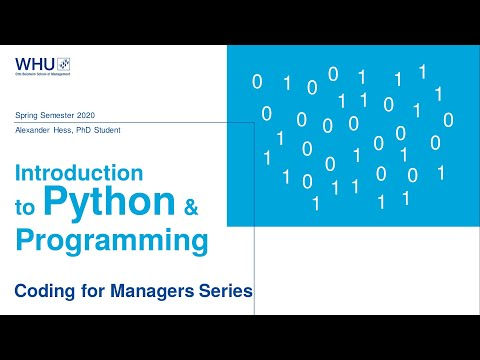

In [132]:
from IPython.display import YouTubeVideo
YouTubeVideo("j4Xn8QFysmc", width="60%")